In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 기본 글꼴을 NanumGothic으로 변경
rc('font', family='Malgun Gothic')


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# PNG 파일을 불러옵니다.
image = cv2.imread('capture_png/Vega_00007.png', cv2.IMREAD_UNCHANGED)
if image is None:
    raise FileNotFoundError("이미지를 불러올 수 없습니다. 파일 경로를 확인하세요.")

# OpenCV는 기본적으로 BGR 순서로 이미지를 읽기 때문에, 3채널 이미지일 경우 RGB로 변환합니다.
# 알파 채널이 있는 경우에는 4채널 이미지로 처리합니다.
if image.ndim == 3:
    if image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif image.shape[2] == 4:
        # BGRA -> RGBA 변환
        b, g, r, a = cv2.split(image)
        image = cv2.merge([r, g, b, a])

# 이미지 회전 함수
def rotate_image(angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    # 회전 행렬 생성 (scale=1.0)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    # 회전된 이미지 생성 (출력 크기는 원본과 동일)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# 인터랙티브 슬라이더를 이용해 회전 각도 조절
@interact(angle=(0, 360, 0.2))
def show_rotated(angle=0):
    rotated = rotate_image(angle)
    plt.figure(figsize=(6, 6))
    plt.imshow(rotated)
    plt.axis('off')
    plt.title(f"Rotated Image: {angle:.1f}°")
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='angle', max=360.0, step=0.2), Output()), _dom_classe…

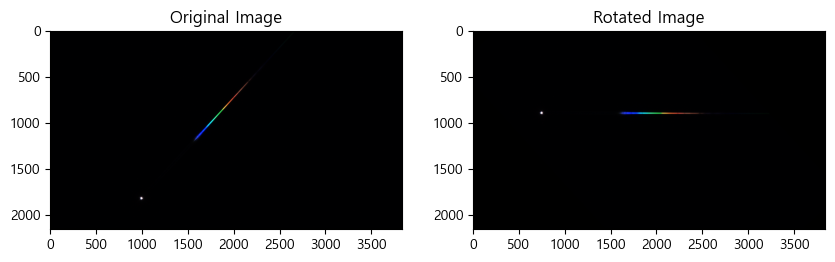

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. PNG 파일을 불러옵니다.
image = cv2.imread('capture_png/Vega_00007.png', cv2.IMREAD_UNCHANGED)
if image is None:
    raise FileNotFoundError("이미지를 불러올 수 없습니다. 파일 경로를 확인하세요.")

# OpenCV는 기본적으로 BGR(또는 BGRA) 순서로 이미지를 읽으므로,
# 컬러 이미지라면 Jupyter에서 올바르게 보이도록 RGB(또는 RGBA)로 변환합니다.
def convert_for_display(img):
    if img.ndim == 2:  # Grayscale
        return img
    elif img.shape[2] == 3:  # BGR -> RGB
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif img.shape[2] == 4:  # BGRA -> RGBA
        return cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
    else:
        return img

image_disp = convert_for_display(image)

# 2. 회전할 각도(예: 45도)를 지정합니다.
angle = 312.4  # 원하는 각도로 변경하세요.

# 이미지의 중심 좌표를 계산합니다.
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

# 회전을 위한 변환 행렬을 생성합니다.
M = cv2.getRotationMatrix2D(center, angle, 1.0)

# 회전된 이미지를 얻습니다.
rotated = cv2.warpAffine(image, M, (w, h))
rotated_disp = convert_for_display(rotated)

# 결과를 Jupyter Lab에서 matplotlib를 이용해 출력합니다.
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_disp)
plt.title("Original Image")
plt.axis()

plt.subplot(1, 2, 2)
plt.imshow(rotated_disp)
plt.title("Rotated Image")
plt.axis()

plt.show()


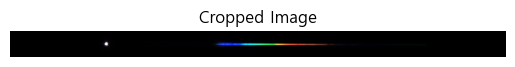

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 회전된 이미지를 얻었다고 가정 (rotated)
# 예: rotated = rotate_image(angle) 처럼 이미 회전된 상태

# 수동으로 자르고 싶은 영역 지정 (y_min ~ y_max)
y_min = 800
y_max = 1000
cropped = rotated_disp[y_min:y_max, :]

plt.imshow(cropped)
plt.title("Cropped Image")
plt.axis('off')
plt.show()


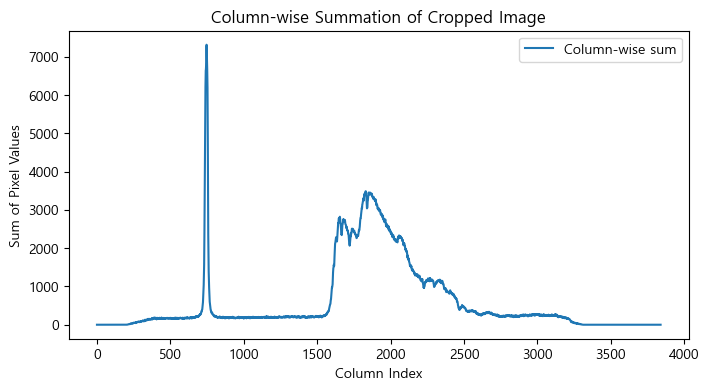

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1) 크롭된 이미지(혹은 필요한 이미지)를 불러옵니다.
#    이미 메모리에 있다면 생략하고, 변수만 사용하세요.
# cropped = cv2.imread('path/to/cropped_image.png', cv2.IMREAD_UNCHANGED)
if cropped is None:
    raise FileNotFoundError("이미지를 불러올 수 없습니다.")

# 2) (선택) 컬러 이미지를 그레이스케일로 변환
#    만약 R/G/B 채널 각각에 대해 별도로 합산하고 싶다면 생략 가능
if cropped.ndim == 3 and cropped.shape[2] == 3:  # BGR 컬러
    cropped_gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
elif cropped.ndim == 3 and cropped.shape[2] == 4:  # BGRA
    cropped_gray = cv2.cvtColor(cropped, cv2.COLOR_BGRA2GRAY)
else:
    cropped_gray = cropped  # 이미 그레이스케일일 경우

# 3) 열 방향으로 합산
column_sums = np.sum(cropped_gray, axis=0)  
# column_sums의 길이는 이미지의 가로 폭(w)과 동일합니다.

# 4) 합산 결과 확인 (예: 그래프 그리기)
plt.figure(figsize=(8, 4))
plt.plot(column_sums, label='Column-wise sum')
plt.title("Column-wise Summation of Cropped Image")
plt.xlabel("Column Index")
plt.ylabel("Sum of Pixel Values")
plt.legend()
plt.show()

# 5) 필요하다면 column_sums를 다른 방식으로 활용(파일 저장 등)
# np.savetxt("column_sums.csv", column_sums, delimiter=",")


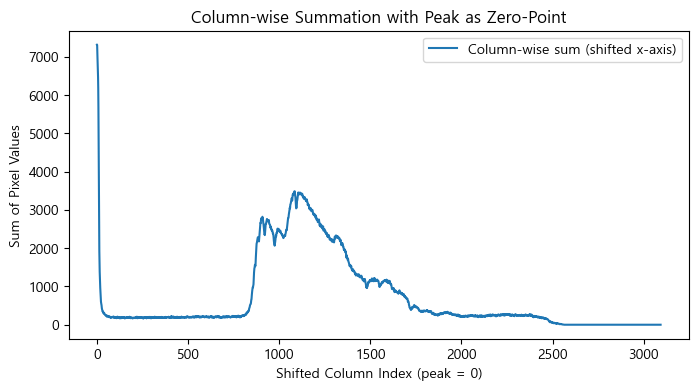

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 불러와서 column-wise summation을 구했다고 가정
# column_sums = ...

# 최대값(피크) 인덱스 찾기
peak_index = np.argmax(column_sums)

# x축 좌표(0 ~ w-1)를 peak_index 기준으로 Shift
# peak_index가 0이 되도록, x_shifted 배열을 만든다
x_shifted = np.arange(len(column_sums)) - peak_index

# x축을 0 ~ 3500까지만 보고 싶다면
mask = (x_shifted >= 0) & (x_shifted <= 3500)
x_shifted_cropped = x_shifted[mask]
column_sums_cropped = column_sums[mask]

# 그래프 그리기
plt.figure(figsize=(8, 4))
plt.plot(x_shifted_cropped, column_sums_cropped, label='Column-wise sum (shifted x-axis)')
plt.title("Column-wise Summation with Peak as Zero-Point")
plt.xlabel("Shifted Column Index (peak = 0)")
plt.ylabel("Sum of Pixel Values")
plt.legend()
plt.show()


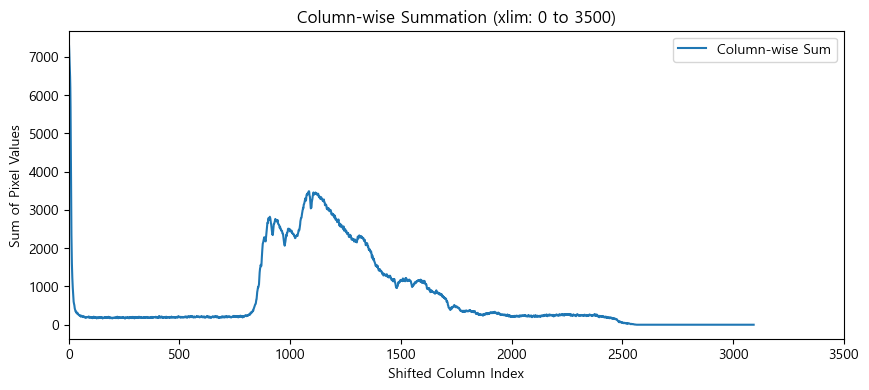

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 불러와서 column-wise summation을 구했다고 가정
# column_sums = ...

# 최대값(피크) 인덱스 찾기
peak_index = np.argmax(column_sums)

# x축 좌표(0 ~ w-1)를 peak_index 기준으로 Shift
# peak_index가 0이 되도록, x_shifted 배열을 만든다
x_shifted = np.arange(len(column_sums)) - peak_index

# x축을 0 ~ 3500까지만 보고 싶다면
mask = (x_shifted >= 0) & (x_shifted <= 3500)
x_shifted_cropped = x_shifted[mask]
column_sums_cropped = column_sums[mask]

# 그래프 그리기
plt.figure(figsize=(10, 4))
plt.plot(x_shifted_cropped, column_sums_cropped, label='Column-wise Sum')
plt.xlim(0, 3500)  # x축 범위를 0~3500으로 설정
plt.xlabel("Shifted Column Index")
plt.ylabel("Sum of Pixel Values")
plt.title("Column-wise Summation (xlim: 0 to 3500)")
plt.legend()
plt.show()

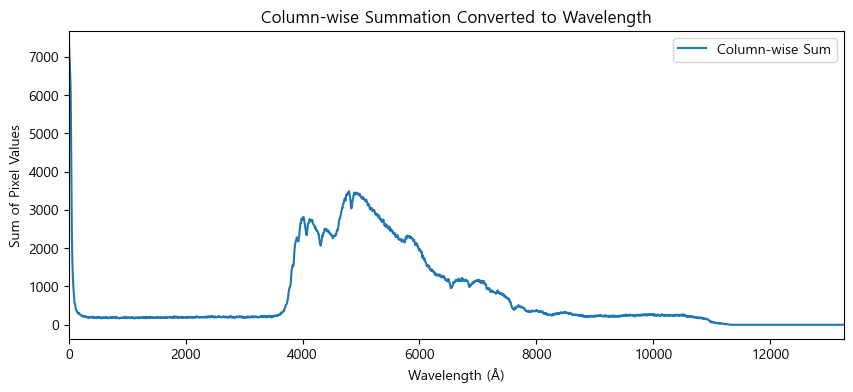

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 불러와서 column-wise summation을 구했다고 가정
# column_sums = ...

# 최대값(피크) 인덱스 찾기
peak_index = np.argmax(column_sums)

# x축 좌표(0 ~ w-1)를 peak_index 기준으로 Shift
# peak_index가 0이 되도록, x_shifted 배열을 만든다
x_shifted = np.arange(len(column_sums)) - peak_index

# x축을 0 ~ 3500까지만 보고 싶다면
mask = (x_shifted >= 0) & (x_shifted <= 3000)
x_shifted_cropped = x_shifted[mask]
column_sums_cropped = column_sums[mask]

# 1 pixel 당 4.42 angstrom로 변환
conversion_factor = 4.42
wavelength = x_shifted_cropped * conversion_factor

# wavelength의 범위는 0 ~ 3500*4.42 angstrom
plt.figure(figsize=(10, 4))
plt.plot(wavelength, column_sums_cropped, label='Column-wise Sum')
plt.xlim(0, 3000 * conversion_factor)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Sum of Pixel Values")
plt.title("Column-wise Summation Converted to Wavelength")
plt.legend()
plt.show()

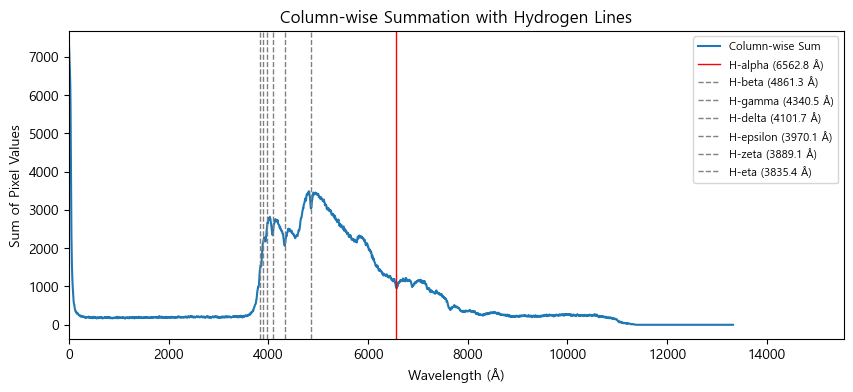

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 불러와서 column-wise summation을 구했다고 가정
# column_sums = ...

# 최대값(피크) 인덱스 찾기
peak_index = np.argmax(column_sums)

# x축 좌표(0 ~ w-1)를 peak_index 기준으로 Shift
# peak_index가 0이 되도록, x_shifted 배열을 만든다
x_shifted = np.arange(len(column_sums)) - peak_index

# x축을 0 ~ 3500까지만 보고 싶다면
mask = (x_shifted >= 0) & (x_shifted <= 3000)
x_shifted_cropped = x_shifted[mask]
column_sums_cropped = column_sums[mask]

# 1 pixel 당 4.42 angstrom로 변환
conversion_factor = 4.44
wavelength = x_shifted_cropped * conversion_factor

# wavelength의 범위는 0 ~ 3500*4.42 angstrom
plt.figure(figsize=(10, 4))
plt.plot(wavelength, column_sums_cropped, label='Column-wise Sum')


# 수소 스펙트럼 라인: H-alpha는 붉은색, 나머지는 회색 점선으로 표시
plt.axvline(x=6562.8, color='red', linestyle='-', linewidth=1, label='H-alpha (6562.8 Å)')
plt.axvline(x=4861.3, color='gray', linestyle='--', linewidth=1, label='H-beta (4861.3 Å)')
plt.axvline(x=4340.5, color='gray', linestyle='--', linewidth=1, label='H-gamma (4340.5 Å)')
plt.axvline(x=4101.7, color='gray', linestyle='--', linewidth=1, label='H-delta (4101.7 Å)')
plt.axvline(x=3970.1, color='gray', linestyle='--', linewidth=1, label='H-epsilon (3970.1 Å)')
plt.axvline(x=3889.1, color='gray', linestyle='--', linewidth=1, label='H-zeta (3889.1 Å)')
plt.axvline(x=3835.4, color='gray', linestyle='--', linewidth=1, label='H-eta (3835.4 Å)')

# x축 범위: pixel 0 ~ 3500에 해당하는 wavelength로 설정
plt.xlim(0, 3500 * conversion_factor)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Sum of Pixel Values")
plt.title("Column-wise Summation with Hydrogen Lines")
plt.legend(loc='upper right', fontsize=8)
plt.show()

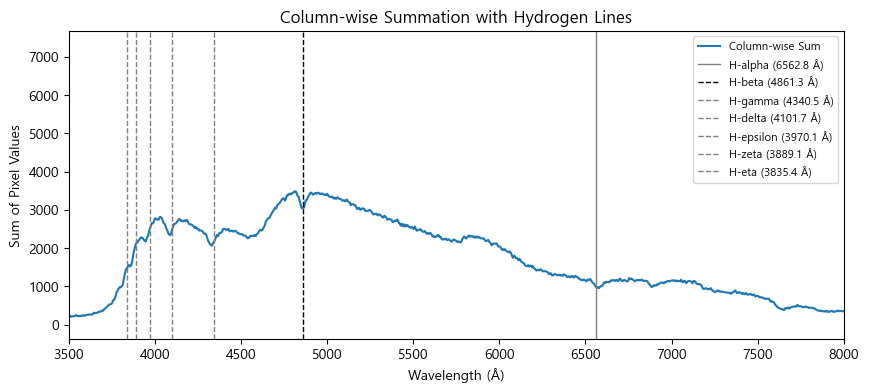

In [10]:
# wavelength의 범위는 0 ~ 3500*4.42 angstrom
plt.figure(figsize=(10, 4))
plt.plot(wavelength, column_sums_cropped, label='Column-wise Sum')


# 수소 스펙트럼 라인: H-alpha는 붉은색, 나머지는 회색 점선으로 표시
plt.axvline(x=6562.8, color='gray', linestyle='-', linewidth=1, label='H-alpha (6562.8 Å)')
plt.axvline(x=4861.3, color='Black', linestyle='--', linewidth=1, label='H-beta (4861.3 Å)')
plt.axvline(x=4340.5, color='gray', linestyle='--', linewidth=1, label='H-gamma (4340.5 Å)')
plt.axvline(x=4101.7, color='gray', linestyle='--', linewidth=1, label='H-delta (4101.7 Å)')
plt.axvline(x=3970.1, color='gray', linestyle='--', linewidth=1, label='H-epsilon (3970.1 Å)')
plt.axvline(x=3889.1, color='gray', linestyle='--', linewidth=1, label='H-zeta (3889.1 Å)')
plt.axvline(x=3835.4, color='gray', linestyle='--', linewidth=1, label='H-eta (3835.4 Å)')

# x축 범위: pixel 0 ~ 3500에 해당하는 wavelength로 설정
plt.xlim(3500, 8000)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Sum of Pixel Values")
plt.title("Column-wise Summation with Hydrogen Lines")
plt.legend(loc='upper right', fontsize=8)
plt.show()

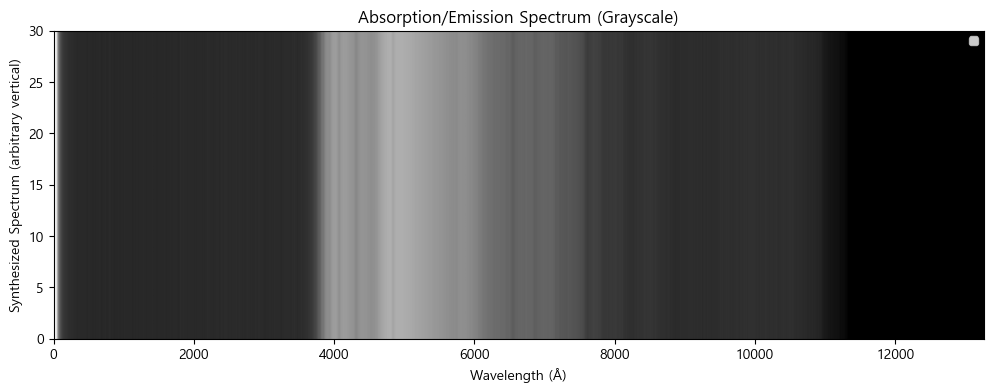

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1) 예: 이미 x_shifted_cropped, column_sums_cropped 존재
#    파장 변환 (1 pixel = 4.42 Å)
# -----------------------------------------------------------
conversion_factor = 4.42
wavelength = x_shifted_cropped * conversion_factor  # 1D array
flux = column_sums_cropped.astype(float)            # 1D array

# -----------------------------------------------------------
# 2) 스펙트럼 정규화 (0 ~ 1 사이)
#    필요시 1 - flux_norm 형태로 반전도 가능
# -----------------------------------------------------------
flux_min, flux_max = flux.min(), flux.max()
flux_norm = (flux - flux_min) / (flux_max - flux_min)  # 0~1 범위

# (선택) 흡수선이 '어두운 줄'이 되도록 반전하고 싶다면:
# flux_norm = 1.0 - flux_norm

# (선택) 감마 보정, 콘트라스트 등 적용 가능
gamma = 0.5  # 예시
flux_norm = flux_norm ** gamma

# -----------------------------------------------------------
# 3) 2차원 이미지로 확장
#    원하는 높이를 지정 (예: 50 px)
# -----------------------------------------------------------
height = 30
spectrum_image = np.tile(flux_norm, (height, 1))  # shape: (height, width)

# -----------------------------------------------------------
# 4) matplotlib로 그레이스케일 스펙트럼 표시
#    extent = [x_min, x_max, y_min, y_max] 설정으로 x축에 파장값 표시
# -----------------------------------------------------------
plt.figure(figsize=(12, 4))

# origin='lower'를 주면 y=0이 아래쪽이 됨
plt.imshow(spectrum_image, 
           cmap='gray',       # 또는 'gray_r'로 반전
           aspect='auto',     # x,y 비율 자동
           origin='lower',    # y=0을 아래로
           extent=[wavelength[0], wavelength[-1], 0, height])

plt.xlabel("Wavelength (Å)")
plt.ylabel("Synthesized Spectrum (arbitrary vertical)")
plt.title("Absorption/Emission Spectrum (Grayscale)")

# -----------------------------------------------------------
# 5) H-alpha 등 수직선 표시
#    원하는 파장에 대해 plt.axvline() 사용
# -----------------------------------------------------------
lines = {
    'H-alpha': 6562.8,
    'H-beta': 4861.3,
    'H-gamma': 4340.5,
    'H-delta': 4101.7,
    'H-epsilon': 3970.1,
    'H-zeta': 3889.1,
    'H-eta': 3835.4
}

'''
for label, wav in lines.items():
    if label == 'H-alpha':
        plt.axvline(x=wav, color='red', linestyle='-', linewidth=2, label=label)
    else:
        plt.axvline(x=wav, color='blue', linestyle='--', linewidth=1, label=label)

'''
# 범례 표시 (중복된 라벨은 자동으로 하나만 표시되도록 처리)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=8)

plt.show()


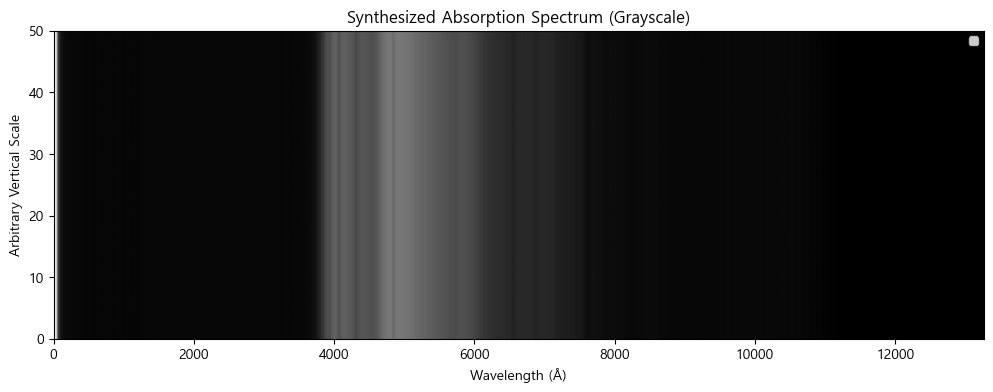

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 이미 계산된 변수들:
# column_sums_cropped: 1D 배열, 각 열의 합산된 픽셀 값 (스펙트럼 데이터)
# x_shifted_cropped: 1D 배열, peak를 기준으로 shift된 x축 픽셀 좌표

# 1 픽셀 당 4.42 Å (angstrom)
conversion_factor = 4.42
wavelength = x_shifted_cropped * conversion_factor  # x축을 파장(Å)로 변환

# 스펙트럼 데이터 준비: flux라 가정 (실제 값이 column_sums_cropped)
flux = column_sums_cropped.astype(float)

# 스펙트럼 정규화 (0~1 범위)
flux_min, flux_max = flux.min(), flux.max()
flux_norm = (flux - flux_min) / (flux_max - flux_min)
# 만약 흡수선이 어두운 줄로 보이길 원한다면 그대로 사용, 
# 흡수선이 밝게 보이길 원한다면 아래와 같이 반전할 수 있습니다.
# flux_norm = 1 - flux_norm

# 1D 스펙트럼을 2D 이미지로 확장 (예: 높이 50 픽셀)
height = 50  # 원하는 높이로 조절
spectrum_image = np.tile(flux_norm, (height, 1))
# spectrum_image의 shape은 (height, number_of_columns)

# 2D 스펙트럼 이미지를 그리기
plt.figure(figsize=(12, 4))
plt.imshow(spectrum_image, 
           cmap='gray', 
           aspect='auto', 
           origin='lower',
           extent=[wavelength[0], wavelength[-1], 0, height])
plt.xlabel("Wavelength (Å)")
plt.ylabel("Arbitrary Vertical Scale")
plt.title("Synthesized Absorption Spectrum (Grayscale)")

# 수직선으로 H-line 표시 (수소 스펙트럼 라인)
lines = {
    'H-alpha': 6562.8,
    'H-beta': 4861.3,
    'H-gamma': 4340.5,
    'H-delta': 4101.7,
    'H-epsilon': 3970.1,
    'H-zeta': 3889.1,
    'H-eta': 3835.4
}
'''
for label, wav in lines.items():
    if label == 'H-alpha':
        plt.axvline(x=wav, color='red', linestyle='-', linewidth=2, label=label)
    else:
        plt.axvline(x=wav, color='blue', linestyle='--', linewidth=1, label=label)
'''

# 중복 범례 항목 제거
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=8)

plt.show()


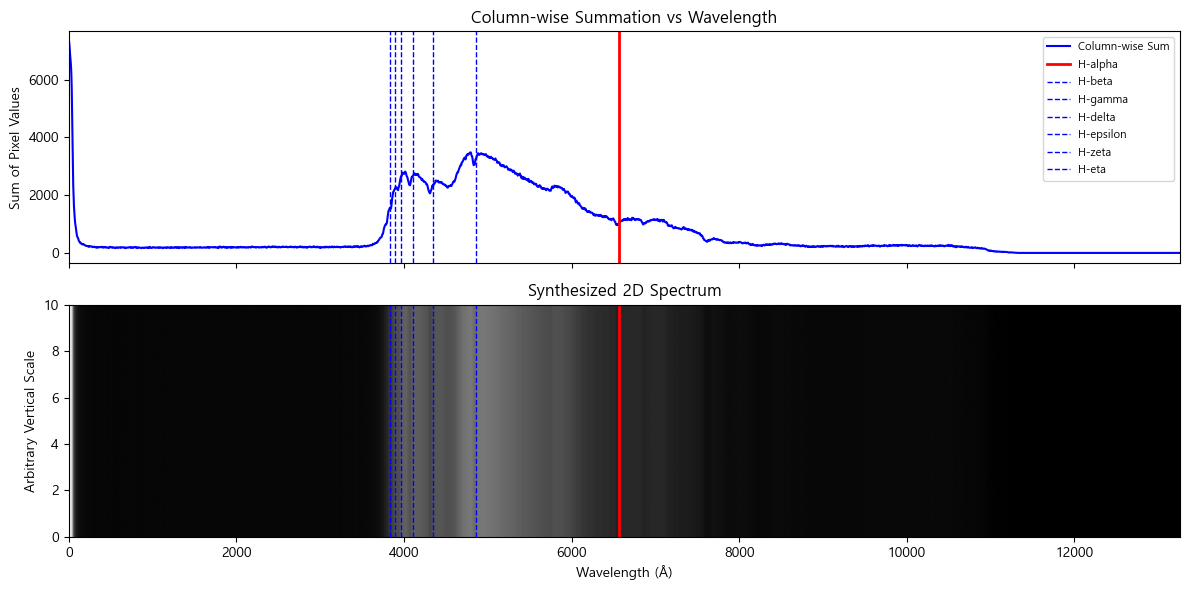

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 이미 계산된 값: column_sums_cropped (1D 스펙트럼), x_shifted_cropped (peak 기준 픽셀좌표)
# 1픽셀 = 4.42 Å 로 변환
conversion_factor = 4.42
wavelength = x_shifted_cropped * conversion_factor
flux = column_sums_cropped.astype(float)

# ----- [1] 1D 스펙트럼 정규화 (선택) -----
flux_min, flux_max = flux.min(), flux.max()
flux_norm = (flux - flux_min) / (flux_max - flux_min)

# ----- [2] 2D 스펙트럼 이미지 만들기 -----
height = 10  # 원하는 이미지 높이(픽셀)
# 1D 배열(flux_norm)을 세로로 height번 반복 -> shape: (height, len(flux_norm))
spectrum_image = np.tile(flux_norm, (height, 1))

# ----- [3] Figure & Subplot 생성 (2행, 1열) -----
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# (a) 첫 번째 서브플롯: 1D 선 그래프
ax1.plot(wavelength, flux, color='blue', label='Column-wise Sum')
ax1.set_ylabel("Sum of Pixel Values")
ax1.set_title("Column-wise Summation vs Wavelength")
ax1.legend()

# (b) 두 번째 서브플롯: 2D 그레이스케일 스펙트럼
#    extent=[x_min, x_max, y_min, y_max]로 x축을 실제 파장 범위에 매핑
im = ax2.imshow(
    spectrum_image,
    cmap='gray',       # or 'gray_r' for reversed grayscale
    aspect='auto',
    origin='lower',
    extent=[wavelength[0], wavelength[-1], 0, height]
)
ax2.set_xlabel("Wavelength (Å)")
ax2.set_ylabel("Arbitrary Vertical Scale")
ax2.set_title("Synthesized 2D Spectrum")

# ----- [4] H-alpha 등 주요 스펙트럼 라인 표시 -----
lines = {
    'H-alpha': 6562.8,
    'H-beta': 4861.3,
    'H-gamma': 4340.5,
    'H-delta': 4101.7,
    'H-epsilon': 3970.1,
    'H-zeta': 3889.1,
    'H-eta': 3835.4
}

# 예시) 두 서브플롯 모두에 표시하고 싶다면:
for label, wav in lines.items():
    if label == 'H-alpha':
        ax1.axvline(x=wav, color='red', linestyle='-', linewidth=2, label=label)
        ax2.axvline(x=wav, color='red', linestyle='-', linewidth=2)
    else:
        ax1.axvline(x=wav, color='blue', linestyle='--', linewidth=1, label=label)
        ax2.axvline(x=wav, color='blue', linestyle='--', linewidth=1)

# 범례 정리 (중복 라벨 제거)
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


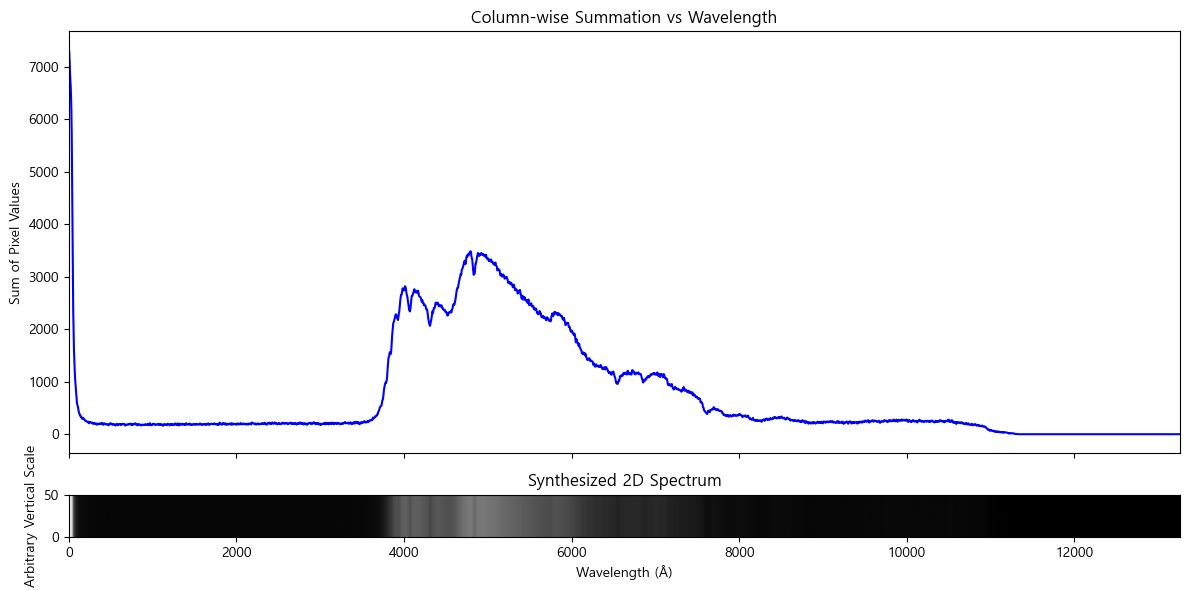

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 예시로 x축(파장), flux 데이터가 이미 있다고 가정
# wavelength = ...
# flux = ...

# 2D 스펙트럼 이미지 생성 (height=50 등)
flux_min, flux_max = flux.min(), flux.max()
flux_norm = (flux - flux_min) / (flux_max - flux_min)
height = 50
spectrum_image = np.tile(flux_norm, (height, 1))

# -------------------------------------------
# 핵심: figsize와 height_ratios를 이용해
#      위:아래 = 4:2 로 설정
# -------------------------------------------
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(12, 6),  # 전체 (12, 6)
    sharex=True,
    gridspec_kw={'height_ratios': [10, 1]}  # 위 4, 아래 2
)

# (1) 첫 번째 서브플롯 (1D 스펙트럼)
ax1.plot(wavelength, flux, color='blue')
ax1.set_ylabel("Sum of Pixel Values")
ax1.set_title("Column-wise Summation vs Wavelength")

# (2) 두 번째 서브플롯 (2D 스펙트럼)
ax2.imshow(
    spectrum_image,
    cmap='gray',
    aspect='auto',
    origin='lower',
    extent=[wavelength[0], wavelength[-1], 0, height]
)
ax2.set_xlabel("Wavelength (Å)")
ax2.set_ylabel("Arbitrary Vertical Scale")
ax2.set_title("Synthesized 2D Spectrum")

plt.tight_layout()
plt.show()


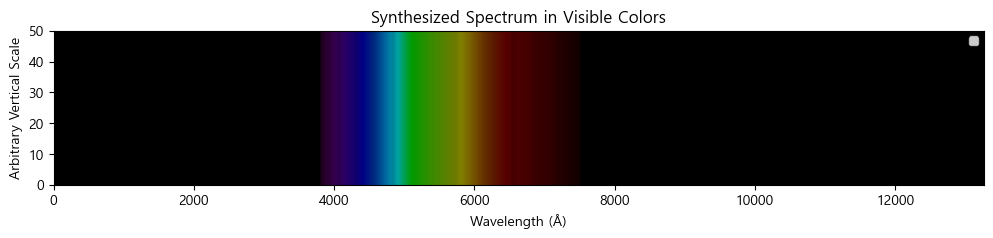

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------
# 1. 이미 계산된 데이터 사용:
#    - column_sums_cropped: 1D 스펙트럼 데이터 (flux)
#    - x_shifted_cropped: peak 기준 shift된 x축 픽셀 좌표
#    - 1 pixel = 4.42 Å (conversion_factor)
# ----------------------------------------------
conversion_factor = 4.42
wavelength = x_shifted_cropped * conversion_factor  # 단위: Å
flux = column_sums_cropped.astype(float)

# 스펙트럼 정규화 (0 ~ 1)
flux_min, flux_max = flux.min(), flux.max()
flux_norm = (flux - flux_min) / (flux_max - flux_min)
# (흡수선이 어둡게 나타나길 원한다면 그대로 사용,
#  반대로 하고 싶다면 flux_norm = 1 - flux_norm)
# (선택) 감마 보정, 콘트라스트 등 적용 가능
gamma = 0.6  # 예시
flux_norm = flux_norm ** gamma
# ----------------------------------------------
# 2. 가시광선 파장(Å)을 nm로 변환 후, 해당 파장에 맞는 RGB를 계산하는 함수
#    (여기서는 380nm ~ 750nm 범위에 해당하는 색상을 사용)
# ----------------------------------------------
def wavelength_to_rgb(wavelength_nm):
    """
    wavelength_nm: 파장 (nm)
    리턴: (R, G, B) 값, 각 값은 0~1 사이.
    """
    if 380 <= wavelength_nm <= 440:
        attenuation = 0.3 + 0.7 * (wavelength_nm - 380) / (440 - 380)
        R = ((440 - wavelength_nm) / (440 - 380)) * attenuation
        G = 0.0
        B = 1.0 * attenuation
    elif 440 < wavelength_nm <= 490:
        R = 0.0
        G = (wavelength_nm - 440) / (490 - 440)
        B = 1.0
    elif 490 < wavelength_nm <= 510:
        R = 0.0
        G = 1.0
        B = (510 - wavelength_nm) / (510 - 490)
    elif 510 < wavelength_nm <= 580:
        R = (wavelength_nm - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif 580 < wavelength_nm <= 645:
        R = 1.0
        G = (645 - wavelength_nm) / (645 - 580)
        B = 0.0
    elif 645 < wavelength_nm <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength_nm) / (750 - 645)
        R = 1.0 * attenuation
        G = 0.0
        B = 0.0
    else:
        R = G = B = 0.0
    return np.array([R, G, B])

# ----------------------------------------------
# 3. 1D 스펙트럼 데이터를 바탕으로 2D 컬러 이미지 생성
#    각 열은 해당 파장에 맞는 기본 색상으로 결정되고,
#    그 색상의 밝기는 flux_norm 값으로 modulate됩니다.
# ----------------------------------------------
width = len(flux_norm)
height = 50  # 원하는 2D 이미지의 높이 (픽셀)
spectrum_rgb = np.zeros((height, width, 3))

for j in range(width):
    # 파장을 nm 단위로 계산 (Å -> nm)
    wl_nm = wavelength[j] / 10.0
    base_color = wavelength_to_rgb(wl_nm)  # 기본 RGB (0~1)
    # flux_norm[j]로 밝기를 조절 (흡수선은 낮은 값 → 어두운 색)
    spectrum_rgb[:, j, :] = flux_norm[j] * base_color

# ----------------------------------------------
# 4. 2D 컬러 스펙트럼 이미지 시각화 및 스펙트럼 라인 표시
# ----------------------------------------------
plt.figure(figsize=(12, 2))
plt.imshow(spectrum_rgb, 
           aspect='auto', 
           origin='lower', 
           extent=[wavelength[0], wavelength[-1], 0, height])
plt.xlabel("Wavelength (Å)")
plt.ylabel("Arbitrary Vertical Scale")
plt.title("Synthesized Spectrum in Visible Colors")

# 주요 스펙트럼 라인 수직선 추가 (예: H-alpha, H-beta 등)
lines = {
    'H-alpha': 6562.8,
    'H-beta': 4861.3,
    'H-gamma': 4340.5,
    'H-delta': 4101.7,
    'H-epsilon': 3970.1,
    'H-zeta': 3889.1,
    'H-eta': 3835.4
}
'''
for label, wav in lines.items():
    # H-alpha는 강조를 위해 붉은색, 나머지는 검은색 점선으로 표시
    if label == 'H-alpha':
        plt.axvline(x=wav, color='red', linestyle='-', linewidth=2, label=label)
    else:
        plt.axvline(x=wav, color='black', linestyle='--', linewidth=1, label=label)
'''
# 중복 범례 제거
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=8)

plt.show()


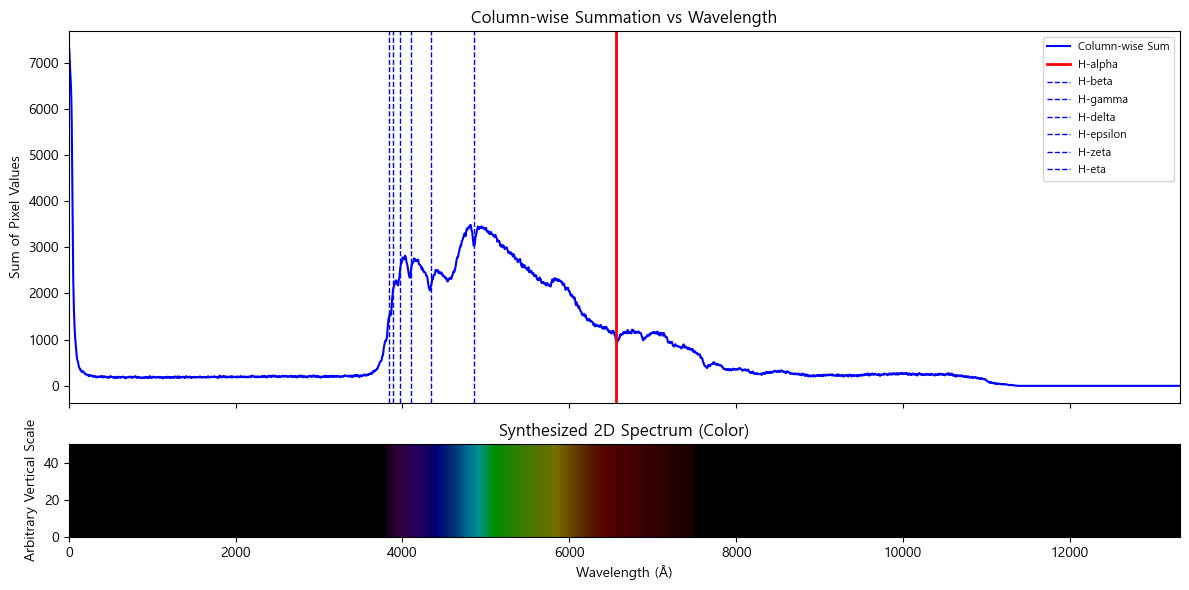

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------
# (1) 데이터 준비
# ---------------------------------------
# 이미 계산된 column_sums_cropped, x_shifted_cropped이 있다고 가정
conversion_factor = 4.44  # 1 pixel = 4.42 Å
wavelength = x_shifted_cropped * conversion_factor  # 파장 (Å)
flux = column_sums_cropped.astype(float)

# 스펙트럼 정규화 (0 ~ 1 범위)
flux_min, flux_max = flux.min(), flux.max()
flux_norm = (flux - flux_min) / (flux_max - flux_min)
# 흡수선이 어둡게 보이길 원한다면 그대로, 반대로 하고 싶다면 아래처럼 반전:
# flux_norm = 1 - flux_norm
# (선택) 감마 보정, 콘트라스트 등 적용 가능
gamma = 1.0  # 예시
flux_norm = flux_norm ** gamma
# 최소값을 0.2 이상으로 만든다
flux_norm = 0.2 + 0.8 * flux_norm 
# ---------------------------------------
# (2) 가시광선 파장(nm)에 따른 RGB 변환 함수
# ---------------------------------------
def wavelength_to_rgb(wavelength_nm):
    """
    wavelength_nm: 파장 (nm)
    return: (R, G, B), 각 0~1 사이
    """
    # 가시광선 범위: 대략 380nm ~ 750nm
    if 380 <= wavelength_nm <= 440:
        attenuation = 0.3 + 0.7 * (wavelength_nm - 380) / (440 - 380)
        R = ((440 - wavelength_nm) / (440 - 380)) * attenuation
        G = 0.0
        B = 1.0 * attenuation
    elif 440 < wavelength_nm <= 490:
        R = 0.0
        G = (wavelength_nm - 440) / (490 - 440)
        B = 1.0
    elif 490 < wavelength_nm <= 510:
        R = 0.0
        G = 1.0
        B = (510 - wavelength_nm) / (510 - 490)
    elif 510 < wavelength_nm <= 580:
        R = (wavelength_nm - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif 580 < wavelength_nm <= 645:
        R = 1.0
        G = (645 - wavelength_nm) / (645 - 580)
        B = 0.0
    elif 645 < wavelength_nm <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength_nm) / (750 - 645)
        R = 1.0 * attenuation
        G = 0.0
        B = 0.0
    else:
        # 범위 밖은 검정 처리
        R = G = B = 0.0
    return np.array([R, G, B])

# ---------------------------------------
# (3) 2D 컬러 스펙트럼 생성
# ---------------------------------------
width = len(flux_norm)
height = 50  # 스펙트럼 띠(세로 두께)
spectrum_rgb = np.zeros((height, width, 3))

for j in range(width):
    # Å -> nm 변환
    wl_nm = wavelength[j] / 10.0
    base_color = wavelength_to_rgb(wl_nm)  # (R, G, B)
    # flux_norm[j]로 밝기(강도) 조절
    spectrum_rgb[:, j, :] = flux_norm[j] * base_color

# ---------------------------------------
# (4) 하나의 Figure 안에 2개의 Subplot 배치
#     위: 1D 선 그래프
#     아래: 2D 컬러 스펙트럼
# ---------------------------------------
fig, (ax1, ax2) = plt.subplots(
    2, 1, 
    figsize=(12, 6),        # 전체 크기
    sharex=True,           # x축 공유
    gridspec_kw={'height_ratios': [4, 1]}  # 위 : 아래 = 4 : 1
)

# ----- (a) 위쪽: 1D 스펙트럼 선 그래프 -----
ax1.plot(wavelength, flux, color='blue', label='Column-wise Sum')
ax1.set_ylabel("Sum of Pixel Values")
ax1.set_title("Column-wise Summation vs Wavelength")
ax1.legend()

# ----- (b) 아래쪽: 2D 컬러 스펙트럼 -----
# extent=[x_min, x_max, y_min, y_max]로 x축을 파장 범위로 매핑
ax2.imshow(
    spectrum_rgb,
    aspect='auto',
    origin='lower',
    extent=[wavelength[0], wavelength[-1], 0, height]
)
ax2.set_xlabel("Wavelength (Å)")
ax2.set_ylabel("Arbitrary Vertical Scale")
ax2.set_title("Synthesized 2D Spectrum (Color)")

# ----- (5) 주요 스펙트럼 라인 표시 -----
lines = {
    'H-alpha': 6562.8,
    'H-beta': 4861.3,
    'H-gamma': 4340.5,
    'H-delta': 4101.7,
    'H-epsilon': 3970.1,
    'H-zeta': 3889.1,
    'H-eta': 3835.4
}

# 두 서브플롯 모두에 수직선 표시 (원하면 ax2만 표시해도 됨)
for label, wav in lines.items():
    if label == 'H-alpha':
        ax1.axvline(x=wav, color='red', linestyle='-', linewidth=2, label=label)
        # ax2.axvline(x=wav, color='red', linestyle='-', linewidth=2)
    else:
        ax1.axvline(x=wav, color='blue', linestyle='--', linewidth=1, label=label)
        # ax2.axvline(x=wav, color='blue', linestyle='--', linewidth=1)

# 범례 중복 제거
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


1. 흡수선 invert 하기

In [17]:
# 정규화 후
flux_norm = (flux - flux_min) / (flux_max - flux_min)

# 흡수선을 더 밝게 보이도록 반전
flux_norm = 1.0 - flux_norm

2. 오프셋 추가

In [18]:
# 0~1 범위로 정규화한 뒤
flux_norm = flux_norm ** gamma
# 최소값을 0.2 이상으로 만든다
flux_norm = 0.2 + 0.8 * flux_norm  

3. HSV(Hue-Saturation-Value) 방식 활용

In [19]:
import colorsys

def wavelength_to_hue_nm(wl_nm):
    """
    파장(nm) → [0, 1] 범위의 hue로 맵핑 (380~750nm 정도)
    380nm -> hue_start, 750nm -> hue_end 등으로 가정
    """
    # 원하는 맵핑 범위 설정 (예: 380~750nm를 hue 0.75~0.0로 매핑)
    hue_start = 0.75  # 보라 ~ 파랑 근처
    hue_end = 0.0     # 빨강 근처
    wl_min, wl_max = 380, 750
    if wl_nm < wl_min: wl_nm = wl_min
    if wl_nm > wl_max: wl_nm = wl_max
    ratio = (wl_nm - wl_min) / (wl_max - wl_min)
    hue = hue_start + (hue_end - hue_start)*ratio
    return hue

# 2D 스펙트럼 생성 시:
for j in range(width):
    wl_nm = wavelength[j] / 10.0  # Å -> nm
    hue = wavelength_to_hue_nm(wl_nm)
    
    # flux_norm[j]가 Value, 채도(s)는 1.0로 가정
    # 흡수선이 어두워지는 효과 (Value ↓)
    v = flux_norm[j]
    s = 1.0
    
    # HSV -> RGB 변환 (colorsys.hsv_to_rgb)
    r, g, b = colorsys.hsv_to_rgb(hue, s, v)
    
    # 여기에 감마나 오프셋 등 추가 조정 가능
    # r, g, b = ...
    
    spectrum_rgb[:, j, :] = [r, g, b]


아래는 HSV 방식을 활용하여, 상단에는 1D 스펙트럼(선 그래프), 하단에는 HSV 기반 컬러 2D 합성 스펙트럼을 그리는 코드 예시입니다.
HSV 방식에서는 파장을 nm 단위로 변환한 후,

Hue: 파장에 따라 (예, 380nm → 0.75, 750nm → 0.0)

Saturation: 1.0

Value: 감마 보정된 flux_norm (즉, 스펙트럼 강도)
를 사용해 RGB 색상을 결정합니다.

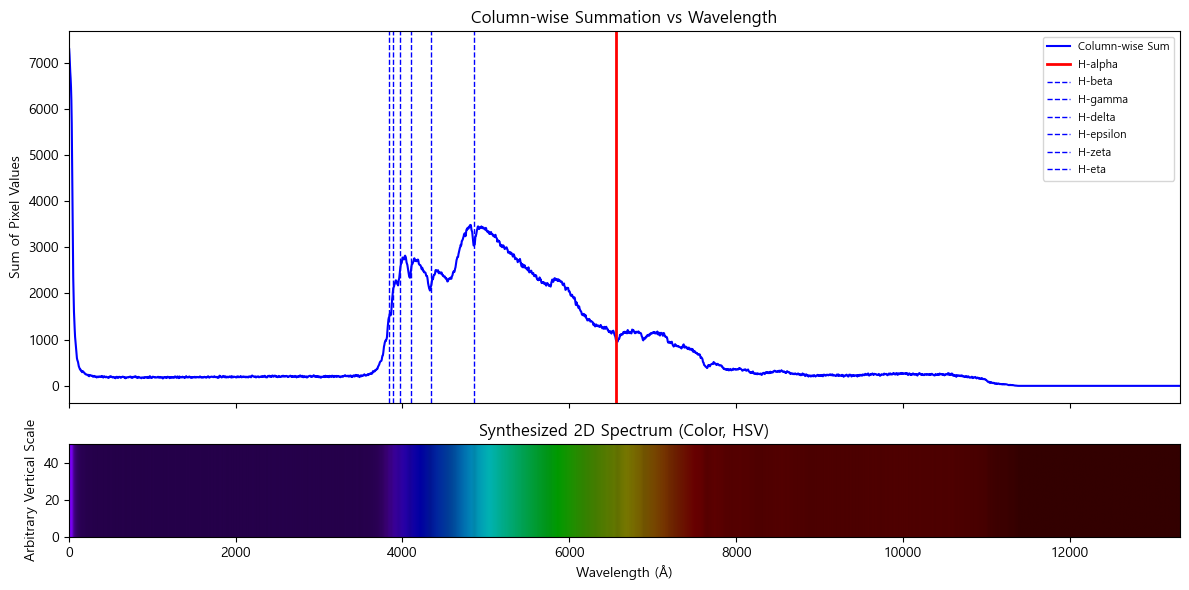

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys

# ---------------------------------------
# (1) 데이터 준비
# ---------------------------------------
# 이미 계산된 변수들: column_sums_cropped, x_shifted_cropped
# 1 pixel = 4.42 Å
conversion_factor = 4.44  # Å per pixel
wavelength = x_shifted_cropped * conversion_factor  # 파장 (Å)
flux = column_sums_cropped.astype(float)

# 1D 스펙트럼 정규화 (0 ~ 1)
flux_min, flux_max = flux.min(), flux.max()
flux_norm = (flux - flux_min) / (flux_max - flux_min)

# (선택) 감마 보정: 낮은 값(흡수선)이 덜 어둡게 보이도록 조정
gamma = 0.6  # 예시 값 (0~1 범위, 1보다 작으면 낮은 값 상승)
flux_norm = flux_norm ** gamma
# 최소값을 0.2 이상으로 만든다
flux_norm = 0.2 + 0.8 * flux_norm  
# ---------------------------------------
# (2) 파장을 nm로 변환 후 HSV의 Hue로 매핑하는 함수
# ---------------------------------------
def wavelength_to_hue_nm(wl_nm):
    """
    파장 wl_nm (nm)를 받아 [0,1] 범위의 hue 값으로 매핑합니다.
    여기서는 380nm를 hue 0.75 (보라색에 가까움), 750nm를 hue 0.0 (빨강)에 매핑합니다.
    """
    wl_min = 380.0
    wl_max = 750.0
    # 파장이 범위를 벗어나면 클램핑
    if wl_nm < wl_min:
        wl_nm = wl_min
    if wl_nm > wl_max:
        wl_nm = wl_max
    hue_start = 0.75  # 380nm 근처
    hue_end = 0.0     # 750nm 근처
    ratio = (wl_nm - wl_min) / (wl_max - wl_min)
    hue = hue_start + (hue_end - hue_start) * ratio
    return hue

# ---------------------------------------
# (3) HSV 기반 2D 컬러 스펙트럼 이미지 생성
# ---------------------------------------
width = len(flux_norm)
height = 50  # 2D 이미지의 세로 두께 (픽셀)
spectrum_rgb = np.zeros((height, width, 3))

for j in range(width):
    # Angstrom 단위를 nm로 변환 (1 nm = 10 Å)
    wl_nm = wavelength[j] / 10.0
    hue = wavelength_to_hue_nm(wl_nm)
    saturation = 1.0
    value = flux_norm[j]  # 감마 보정된 스펙트럼 강도
    r, g, b = colorsys.hsv_to_rgb(hue, saturation, value)
    spectrum_rgb[:, j, 0] = r
    spectrum_rgb[:, j, 1] = g
    spectrum_rgb[:, j, 2] = b

# ---------------------------------------
# (4) Figure 생성: 상단 1D 선 그래프, 하단 HSV 컬러 2D 스펙트럼
# ---------------------------------------
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(12, 6),           # 전체 Figure 크기 (12 x 6 인치)
    sharex=True,               # x축 공유
    gridspec_kw={'height_ratios': [4, 1]}  # 상단:하단 = 4:1
)

# 상단: 1D 스펙트럼 선 그래프
ax1.plot(wavelength, flux, color='blue', label='Column-wise Sum')
ax1.set_ylabel("Sum of Pixel Values")
ax1.set_title("Column-wise Summation vs Wavelength")
ax1.legend()

# 하단: 2D HSV 컬러 스펙트럼
ax2.imshow(
    spectrum_rgb,
    aspect='auto',
    origin='lower',
    extent=[wavelength[0], wavelength[-1], 0, height]
)
ax2.set_xlabel("Wavelength (Å)")
ax2.set_ylabel("Arbitrary Vertical Scale")
ax2.set_title("Synthesized 2D Spectrum (Color, HSV)")

# ---------------------------------------
# (5) 주요 스펙트럼 라인(H-line) 표시
# ---------------------------------------
lines = {
    'H-alpha': 6562.8,
    'H-beta': 4861.3,
    'H-gamma': 4340.5,
    'H-delta': 4101.7,
    'H-epsilon': 3970.1,
    'H-zeta': 3889.1,
    'H-eta': 3835.4
}

for label, wav in lines.items():
    if label == 'H-alpha':
        ax1.axvline(x=wav, color='red', linestyle='-', linewidth=2, label=label)
        # ax2.axvline(x=wav, color='red', linestyle='-', linewidth=2)
    else:
        ax1.axvline(x=wav, color='blue', linestyle='--', linewidth=1, label=label)
        # ax2.axvline(x=wav, color='blue', linestyle='--', linewidth=1)

# 중복 범례 제거
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()
